## Cargar los datos

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

input_file = 'city.json'

with open(input_file, 'r') as f:
    data = json.load(f)
    
df_cars = pd.DataFrame({"cars_delay": data['cars_delay'], "cars_semaphone_delay": data['cars_semaphore_delay']})
df_walkers = pd.DataFrame({"walkers_delay": data['walkers_delay'], "walkers_semaphore_delay": data['walkers_semaphore_delay']})
print(df_cars, df_walkers)

       cars_delay  cars_semaphone_delay
0              63                    35
1              71                    26
2              99                    37
3             182                    43
4             194                    64
...           ...                   ...
14358        2620                  1015
14359         687                   265
14360         450                   159
14361        1554                   624
14362         241                   107

[14363 rows x 2 columns] Empty DataFrame
Columns: [walkers_delay, walkers_semaphore_delay]
Index: []


In [2]:
pd.set_option('display.float_format', '{:.3f}'.format)
df_cars.describe()

,cars_delay,cars_semaphone_delay
count,14363.000,14363.000
mean,737.467,287.039
std,794.689,312.825
min,1.000,0.000
25%,212.000,80.000
50%,482.000,187.000
75%,980.000,384.000
max,8696.000,3404.000


In [3]:
pd.set_option('display.float_format', '{:.3f}'.format)
df_walkers.describe()

,walkers_delay,walkers_semaphore_delay
count,0.000,0.000
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


## Mostrar histograma con los datos

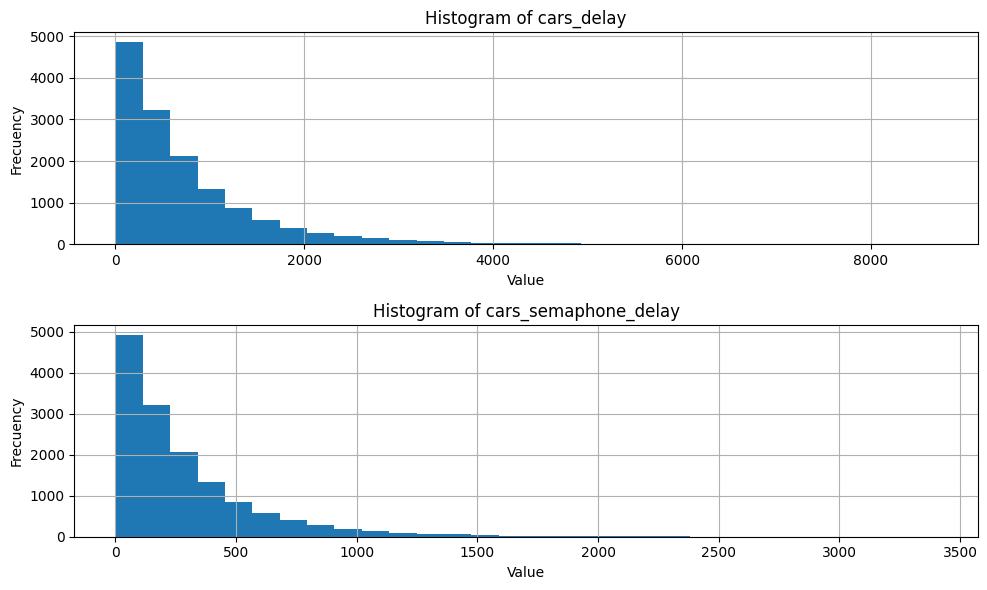

In [4]:
columns_to_plot = [col for col in df_cars.columns]

fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, len(columns_to_plot)*3))

for i, col in enumerate(columns_to_plot):
    df_cars[col].hist(bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frecuency')

plt.tight_layout()

plt.show()

KeyError: 'walkers_delay'

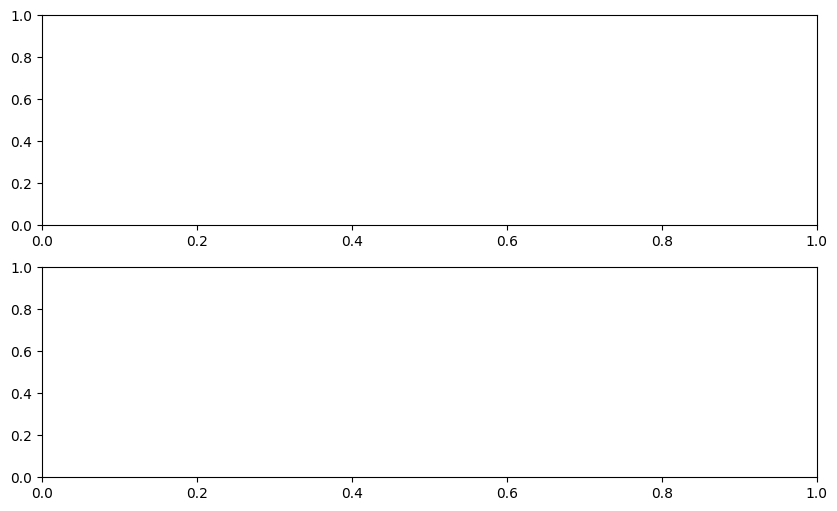

In [5]:
columns_to_plot = [col for col in df_walkers.columns]

fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, len(columns_to_plot)*3))

for i, col in enumerate(columns_to_plot):
    df_cars[col].hist(bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frecuency')

plt.tight_layout()

plt.show()

Como podemos apreciar, ninguna de nuestras variables tiene un comportamiento normal

## Análisis de normalidad

In [ ]:
for x in df_cars.columns:
    print(f"El kurtosis de {x} es {df_cars[x].kurtosis()}")
    print(f"La Asimetría de {x} es {df_cars[x].skew()}")
print()
for x in df_walkers.columns:
    print(f"El kurtosis de {x} es {df_walkers[x].kurtosis()}")
    print(f"La Asimetría de {x} es {df_walkers[x].skew()}")

El kurtosis de cars_delay es 9.941143795818949
La Asimetría de cars_delay es 2.5222197882948656
El kurtosis de cars_semaphone_delay es 9.705789499444355
La Asimetría de cars_semaphone_delay es 2.497374354493005

El kurtosis de walkers_delay es nan
La Asimetría de walkers_delay es nan
El kurtosis de walkers_semaphore_delay es nan
La Asimetría de walkers_semaphore_delay es nan


### Test de Normalidad

In [ ]:
from scipy.stats import kstest, shapiro


for x in df_cars.columns:
    test = df_cars[x].sample(100)
    D, p_value = kstest(test, 'norm')
    print(x)    
    print(f"D = {D}")
    print(f"p-value = {p_value}")
    print()

for x in df_walkers.columns:
    test = df_walkers[x].sample(100)
    D, p_value = kstest(test, 'norm')
    print(x)    
    print(f"D = {D}")
    print(f"p-value = {p_value}")
    print()

cars_delay
D = 0.9999997133484281
p-value = 0.0

cars_semaphone_delay
D = 0.9786501019683699
p-value = 1.7402454649180068e-167



ValueError: a must be greater than 0 unless no samples are taken

## Matriz de Correlación

Mediante la matriz de correlación veremos la relación entre las variables y nos dará una idea de las variables a seleccionar

Correlation matrix for the Cars DataFrame:
                      cars_delay  cars_semaphone_delay
cars_delay                 1.000                 0.998
cars_semaphone_delay       0.998                 1.000


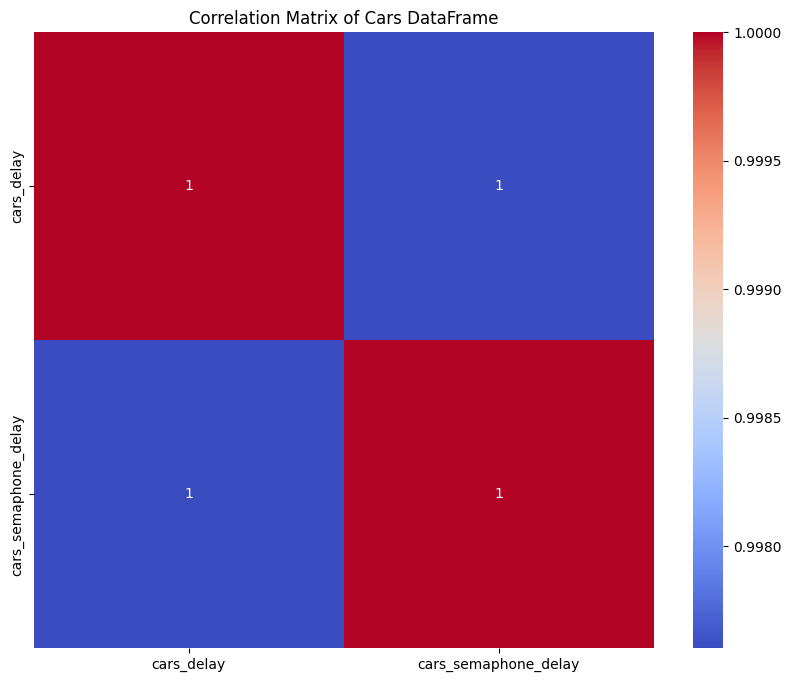

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que ya tienes cargados los DataFrames df_primero y df_segundo

# Calcular la matriz de correlación
corr_matrix = df_cars.corr()

print("Correlation matrix for the Cars DataFrame:")
print(corr_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Cars DataFrame')
plt.show()


/home/david/bin/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:194: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/david/bin/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


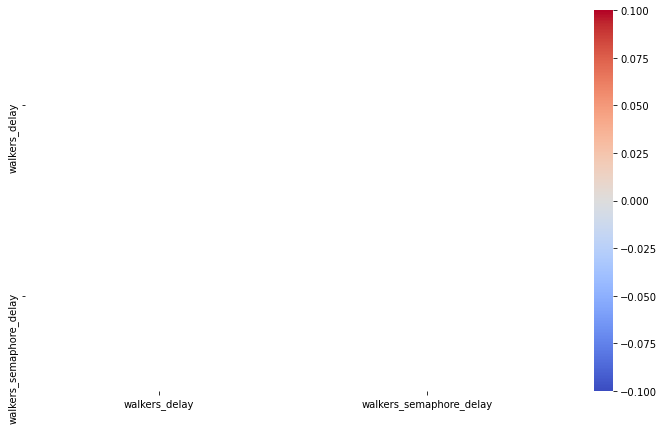

In [ ]:
correlation_matrix = df_walkers.corr()
# print(correlation_matrix)

fig, ax = plt.subplots(figsize=(12, 7)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


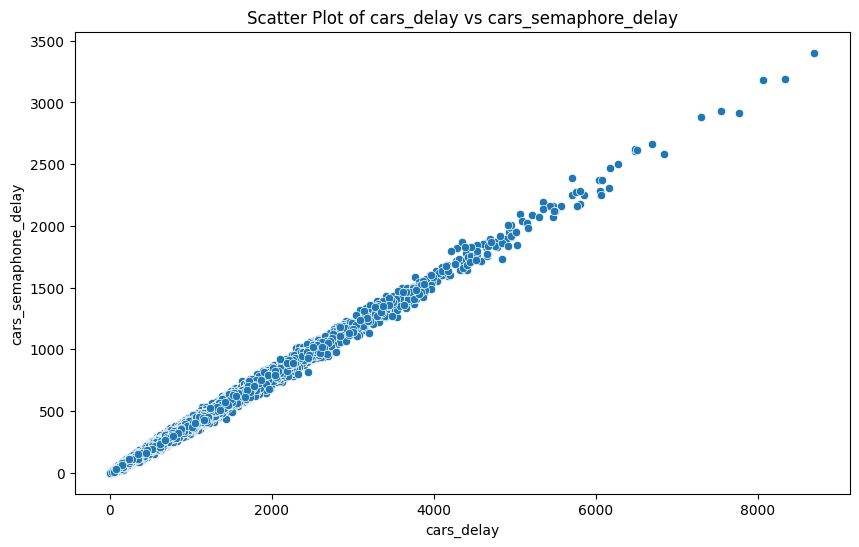

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cars_delay', y='cars_semaphone_delay', data=df_cars)
plt.title('Scatter Plot of cars_delay vs cars_semaphore_delay')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='walkers_delay', y='walkers_semaphone_delay', data=df_walkers)
plt.title('Scatter Plot of cars_delay vs cars_semaphore_delay')
plt.show()

ValueError: Could not interpret value `walkers_semaphone_delay` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

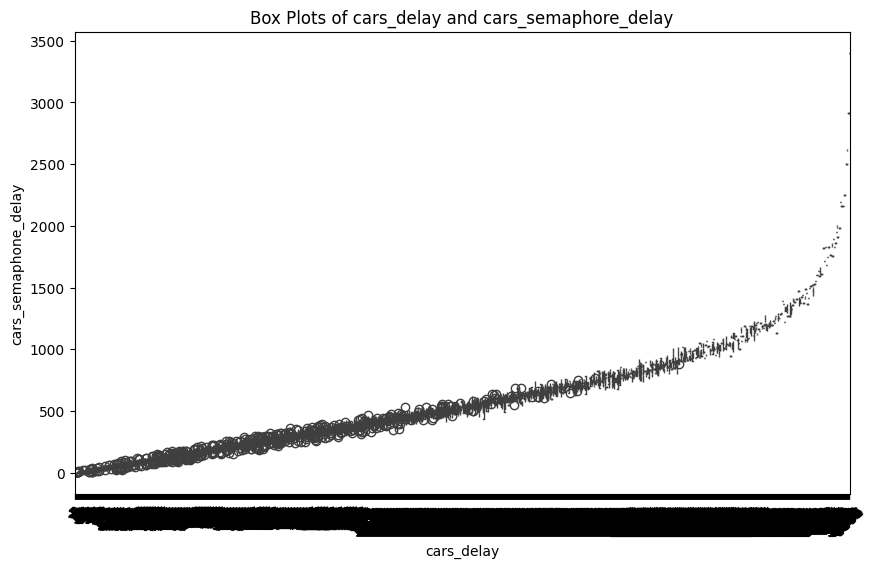

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cars, x='cars_delay', y='cars_semaphone_delay')
plt.title('Box Plots of cars_delay and cars_semaphore_delay')
plt.xticks(rotation=45)
plt.show()

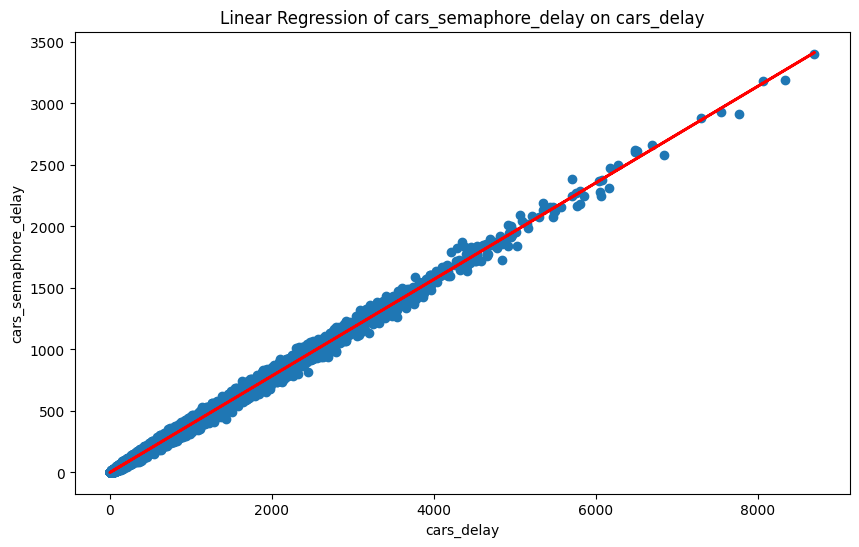

In [ ]:
# 7. Regression analysis
X = df_cars['cars_delay']
y = df_cars['cars_semaphone_delay']

# Simple linear regression
slope, intercept = np.polyfit(X, y, 1)
line = slope * X + intercept

plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, line, color='red', linewidth=2)
plt.title('Linear Regression of cars_semaphore_delay on cars_delay')
plt.xlabel('cars_delay')
plt.ylabel('cars_semaphore_delay')
plt.show()

In [8]:
# 7. Regression analysis
X = df_walkers['walkers_delay']
y = df_walkers['walkers_semaphone_delay']

# Simple linear regression
slope, intercept = np.polyfit(X, y, 1)
line = slope * X + intercept

plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, line, color='red', linewidth=2)
plt.title('Linear Regression of cars_semaphore_delay on cars_delay')
plt.xlabel('cars_delay')
plt.ylabel('cars_semaphore_delay')
plt.show()

KeyError: 'walkers_semaphone_delay'